# W02 Assignment Jabodetabek Property Dataset
# Howie Homan - 0706022310040


In [ ]:
# Section 1: Data Preparation and Cleaning

In [2]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [5]:
# 1. Load the dataset from the source URL
data_url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/jabodetabek_house_price.csv "
house_data = pd.read_csv(data_url, sep=',')

# Display the first few entries to get an overview
house_data.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


In [6]:
# 2. Inspect the dataset's properties
print("--- A Quick Look at the Data's Structure ---")
print(house_data.head())
print("\n--- Data Types and Non-Null Counts ---")
house_data.info()
print("\n--- Statistical Summary ---")
print(house_data.describe())

--- A Quick Look at the Data's Structure ---
                                                 url   price_in_rp  \
0  https://www.rumah123.com/properti/bekasi/hos11...  2.990000e+09   
1  https://www.rumah123.com/properti/bekasi/hos10...  1.270000e+09   
2  https://www.rumah123.com/properti/bekasi/hos10...  1.950000e+09   
3  https://www.rumah123.com/properti/bekasi/hos10...  3.300000e+09   
4  https://www.rumah123.com/properti/bekasi/hos10...  4.500000e+09   

                                               title  \
0  Rumah cantik Sumarecon Bekasi\nLingkungan asri...   
1          Rumah Kekinian, Magenta Summarecon Bekasi   
2  Rumah Cantik 2 Lantai Cluster Bluebell Summare...   
3  Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...   
4  Rumah Hoek di Cluster Maple Summarecon Bekasi,...   

                     address           district     city       lat  \
0  Summarecon Bekasi, Bekasi  Summarecon Bekasi   Bekasi -6.223945   
1  Summarecon Bekasi, Bekasi  Summarecon Bekasi   Bekasi 

In [7]:
# 3. Address missing values
print("\n--- Missing Values Before Imputation ---")
print(house_data.isnull().sum())

# To handle missing data, I'll adopt a common imputation strategy.
# For numerical features, the mean is a good central measure to fill gaps without affecting the overall average.
# For categorical features, the most frequent value (mode) will be used, as it's the most likely category.

# Separate columns by data type
numerical_features = house_data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = house_data.select_dtypes(include=['object']).columns

# Impute numerical columns with the mean
for feature in numerical_features:
    mean_value = house_data[feature].mean()
    house_data[feature].fillna(mean_value, inplace=True)

# Impute categorical columns with the mode
for feature in categorical_features:
    mode_value = house_data[feature].mode()[0]
    house_data[feature].fillna(mode_value, inplace=True)


print("\n--- Missing Values After Imputation ---")
print(house_data.isnull().sum())


--- Missing Values Before Imputation ---
url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64

--- Missing Values After Imputation ---
url                     0
price_in_rp             0
title                   0
address                 0
district         

/tmp/ipython-input-3971262912.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_data[feature].fillna(mean_value, inplace=True)
/tmp/ipython-input-3971262912.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

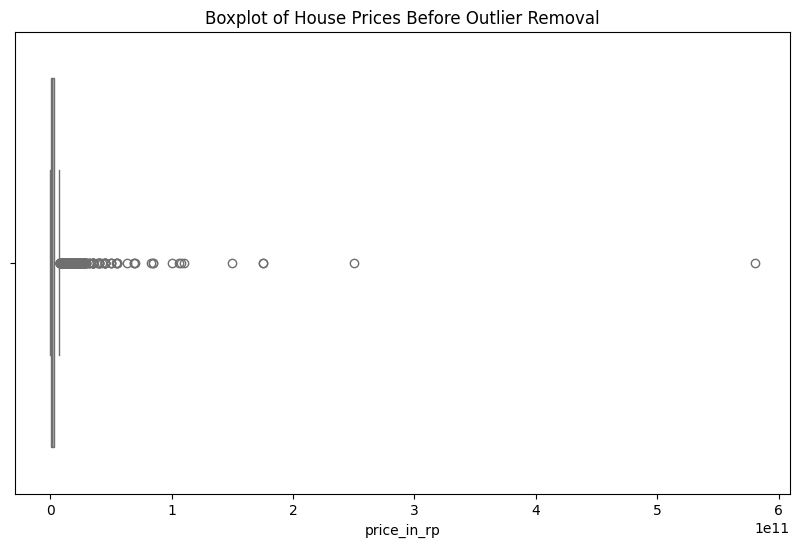

In [8]:
# 4. Detect and handle outliers in price
plt.figure(figsize=(10, 6))
sns.boxplot(x=house_data['price_in_rp'], color='skyblue')
plt.title('Boxplot of House Prices Before Outlier Removal')
plt.show()

# Justification: The boxplot of house prices clearly indicates the presence of extreme upper-end outliers.
# These values can disproportionately influence statistical models, so I'll cap the price
# at 20 billion Rupiah to create a more robust dataset for analysis.
house_data = house_data[house_data['price_in_rp'] < 20000000000]

In [9]:
# 5. Engineer new features
# Extract the number of facilities to create a numerical feature.
house_data['num_facilities'] = house_data['facilities'].apply(lambda x: len(str(x).split(',')))

# Bin the 'num_facilities' feature to create a categorical representation.
facility_bins = [0, 2, 5, 10, house_data['num_facilities'].max()]
category_labels = ['Few', 'Moderate', 'Good', 'Excellent']
house_data['facilities_category'] = pd.cut(house_data['num_facilities'], bins=facility_bins, labels=category_labels, right=False)

print("\n--- Data After Feature Engineering (First 5 Rows) ---")
print(house_data.head())


--- Data After Feature Engineering (First 5 Rows) ---
                                                 url   price_in_rp  \
0  https://www.rumah123.com/properti/bekasi/hos11...  2.990000e+09   
1  https://www.rumah123.com/properti/bekasi/hos10...  1.270000e+09   
2  https://www.rumah123.com/properti/bekasi/hos10...  1.950000e+09   
3  https://www.rumah123.com/properti/bekasi/hos10...  3.300000e+09   
4  https://www.rumah123.com/properti/bekasi/hos10...  4.500000e+09   

                                               title  \
0  Rumah cantik Sumarecon Bekasi\nLingkungan asri...   
1          Rumah Kekinian, Magenta Summarecon Bekasi   
2  Rumah Cantik 2 Lantai Cluster Bluebell Summare...   
3  Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...   
4  Rumah Hoek di Cluster Maple Summarecon Bekasi,...   

                     address           district     city       lat  \
0  Summarecon Bekasi, Bekasi  Summarecon Bekasi   Bekasi -6.223945   
1  Summarecon Bekasi, Bekasi  Summarecon Bekasi

In [ ]:
# Section 2: Exploratory Analysis & Visualization

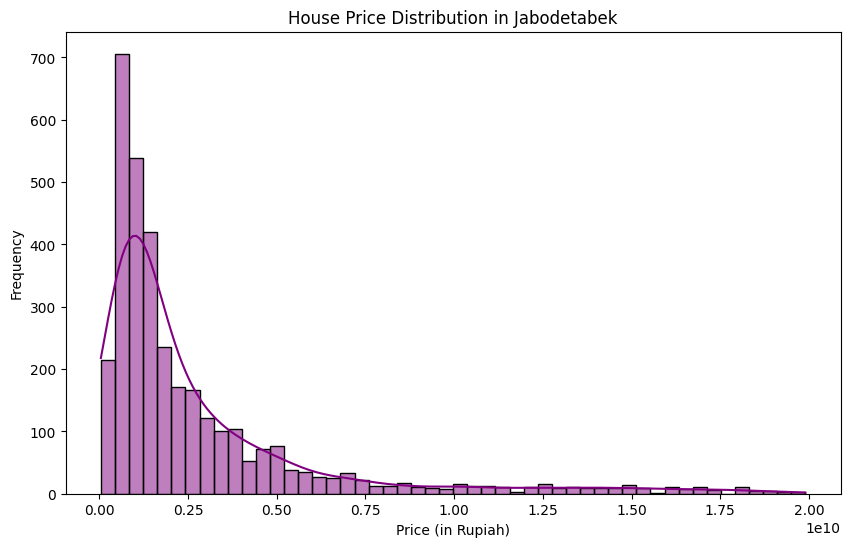


The histogram confirms a right-skewed distribution for house prices. 
This is a common characteristic in real estate markets, where most properties are clustered in a lower price range, with fewer, more expensive properties extending the tail to the right.


In [10]:
# 1. Histogram of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(house_data['price_in_rp'], bins=50, kde=True, color='purple')
plt.title('House Price Distribution in Jabodetabek')
plt.xlabel('Price (in Rupiah)')
plt.ylabel('Frequency')
plt.show()

print("\nThe histogram confirms a right-skewed distribution for house prices. \nThis is a common characteristic in real estate markets, where most properties are clustered in a lower price range, with fewer, more expensive properties extending the tail to the right.")

/tmp/ipython-input-3080584087.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=listings_per_city.index, y=listings_per_city.values, palette='mako')


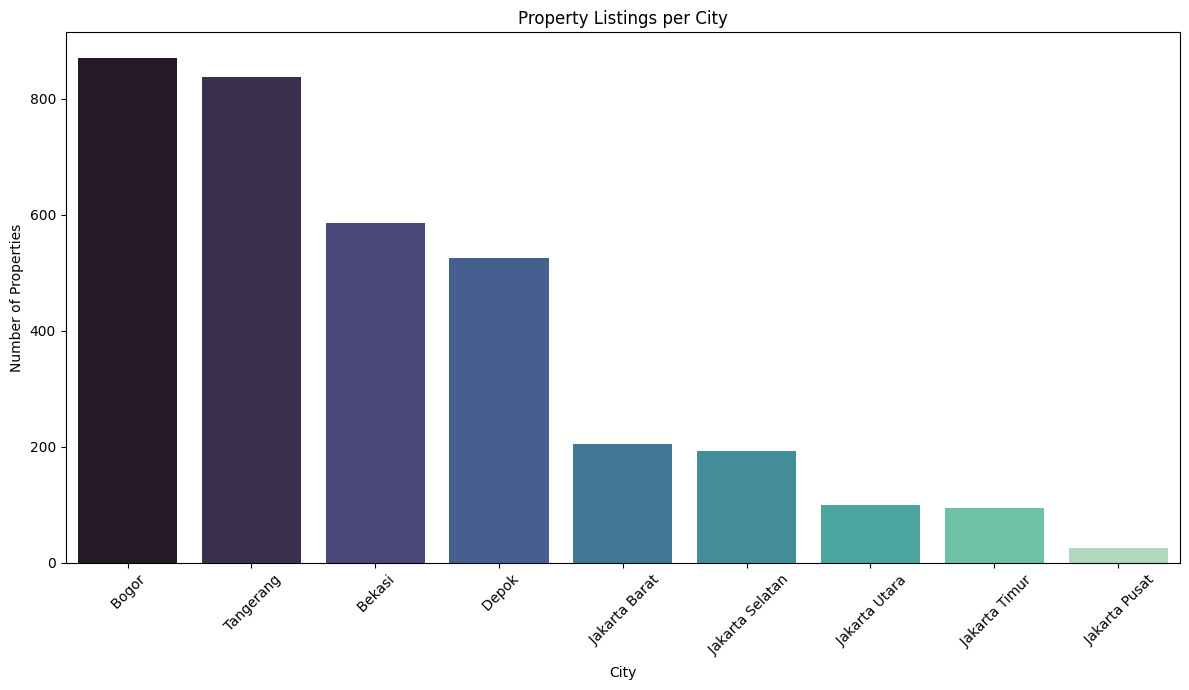


This chart illustrates the volume of property listings across different cities. 
Bogor stands out with the highest number of listings, followed closely by Tangerang and Bekasi, indicating these are major hubs of real estate activity in the dataset.


In [11]:
# 2. Barplot of Property Listings per City
plt.figure(figsize=(12, 7))
listings_per_city = house_data['city'].value_counts()
sns.barplot(x=listings_per_city.index, y=listings_per_city.values, palette='mako')
plt.title('Property Listings per City')
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nThis chart illustrates the volume of property listings across different cities. \nBogor stands out with the highest number of listings, followed closely by Tangerang and Bekasi, indicating these are major hubs of real estate activity in the dataset.")

/tmp/ipython-input-2074040303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city', y='price_in_rp', data=house_data, palette='rocket')


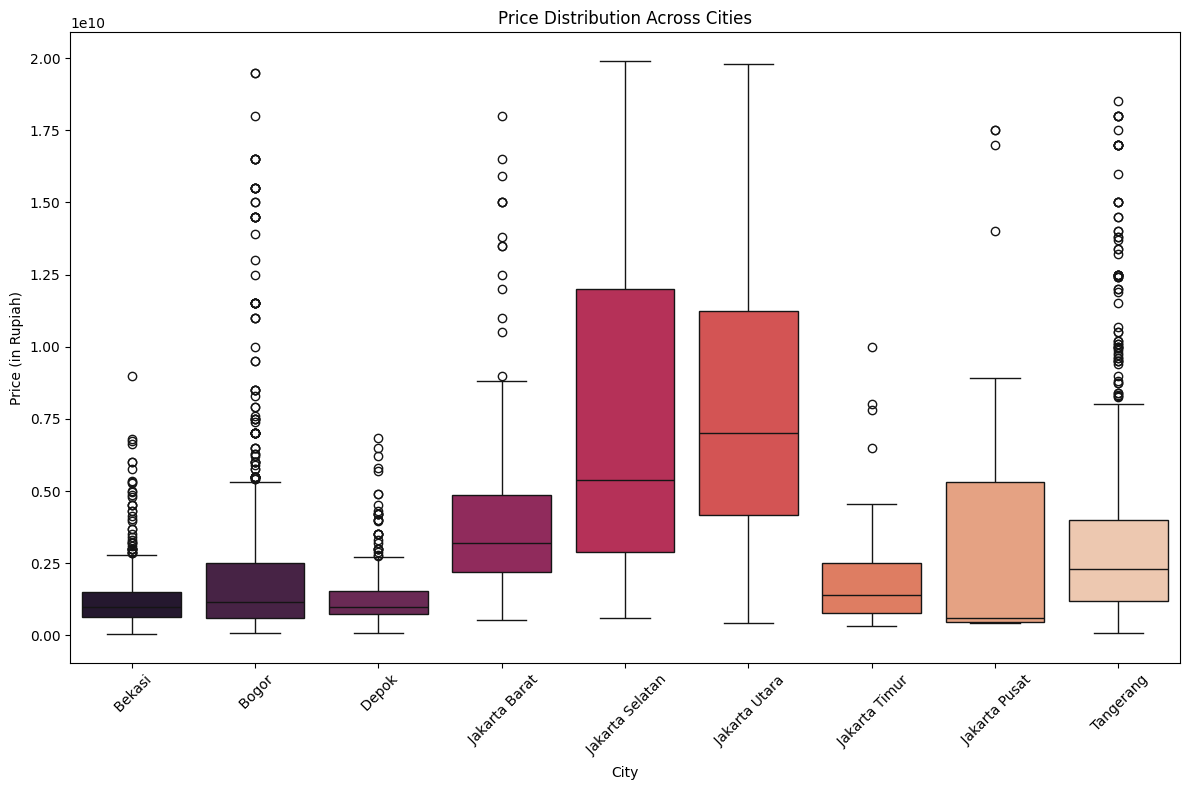


Comparing price distributions reveals significant market differences between cities. 
Jakarta Pusat exhibits the highest median price and the greatest variability (interquartile range), positioning it as the most premium and diverse market in this dataset.


In [12]:
# 3. Boxplot of Price Distribution Across Cities
plt.figure(figsize=(12, 8))
sns.boxplot(x='city', y='price_in_rp', data=house_data, palette='rocket')
plt.title('Price Distribution Across Cities')
plt.xlabel('City')
plt.ylabel('Price (in Rupiah)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nComparing price distributions reveals significant market differences between cities. \nJakarta Pusat exhibits the highest median price and the greatest variability (interquartile range), positioning it as the most premium and diverse market in this dataset.")

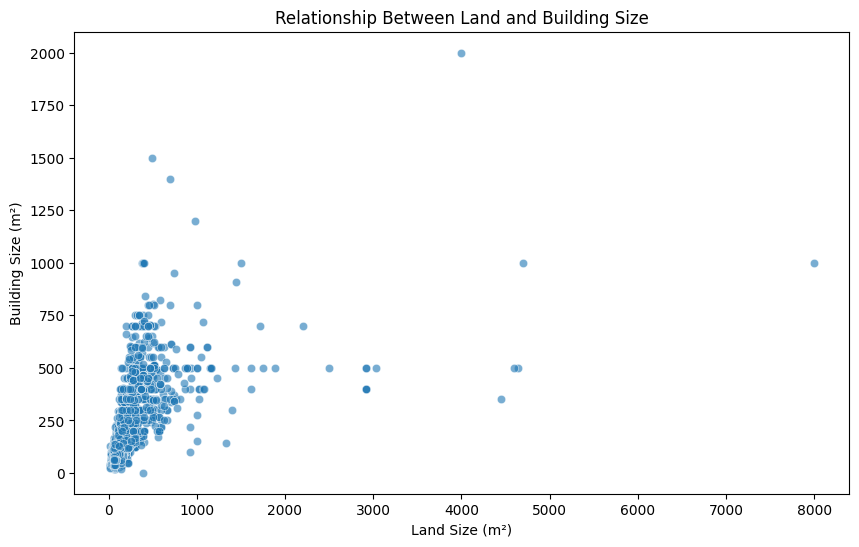


This scatter plot demonstrates a strong, positive linear relationship between land and building size. 
As expected, properties with larger land areas tend to have larger buildings constructed on them.


In [13]:
# 4. Scatter Plot of Land Size vs. Building Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='land_size_m2', y='building_size_m2', data=house_data, alpha=0.6)
plt.title('Relationship Between Land and Building Size')
plt.xlabel('Land Size (m²)')
plt.ylabel('Building Size (m²)')
plt.show()

print("\nThis scatter plot demonstrates a strong, positive linear relationship between land and building size. \nAs expected, properties with larger land areas tend to have larger buildings constructed on them.")

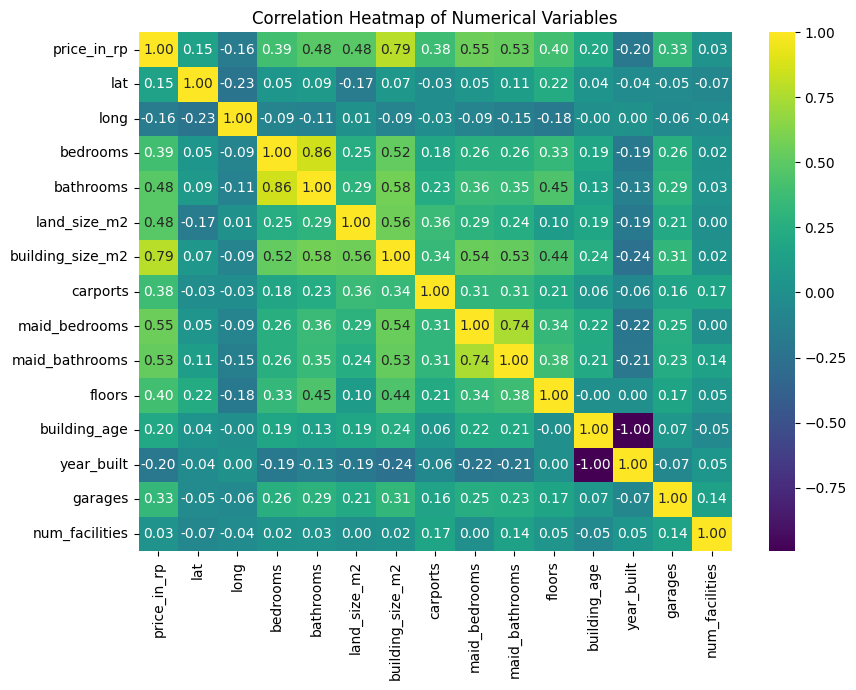


The heatmap offers a clear overview of the relationships between numerical features. The most notable correlations are:
1. Price (`price_in_rp`) shows a strong positive correlation with both `building_size_m2` and `land_size_m2`. This confirms the intuitive idea that larger properties command higher prices.
2. The number of `bedrooms` and `bathrooms` are highly correlated, which is logical since they typically scale together in property design.
3. The number of `floors` has a moderately positive correlation with price, suggesting that multi-story homes are generally more expensive.
This analysis collectively provides a solid foundation for understanding the key drivers of property values and market dynamics in the Jabodetabek region.


In [14]:
# 5. Heatmap of Numerical Feature Correlations
plt.figure(figsize=(9, 7))
# Isolate numerical data for the correlation matrix
numeric_data = house_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

print("\nThe heatmap offers a clear overview of the relationships between numerical features. The most notable correlations are:\n1. Price (`price_in_rp`) shows a strong positive correlation with both `building_size_m2` and `land_size_m2`. This confirms the intuitive idea that larger properties command higher prices.\n2. The number of `bedrooms` and `bathrooms` are highly correlated, which is logical since they typically scale together in property design.\n3. The number of `floors` has a moderately positive correlation with price, suggesting that multi-story homes are generally more expensive.\nThis analysis collectively provides a solid foundation for understanding the key drivers of property values and market dynamics in the Jabodetabek region.")